In [1]:
import pandas as pd #Data Manipulation
import numpy as np #Numerical work
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 15)

# Cleaning:  Handle Missing Values & Drop unwanted rows and columns

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

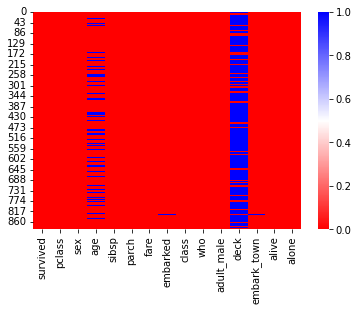

In [7]:
sns.heatmap(df.isnull(),cmap="bwr_r")

In [8]:
df[df["age"].isnull()].survived.value_counts()

0    125
1     52
Name: survived, dtype: int64

In [9]:
miss_df = df[df["age"].isnull()]
miss_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [10]:
c = miss_df.pclass.value_counts()
c

3    136
1     30
2     11
Name: pclass, dtype: int64

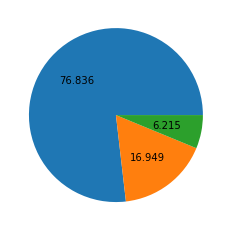

In [11]:
plt.pie(c,autopct="%0.3f")

plt.show()

In [12]:
df[(df["pclass"]==3) & (df["survived"]==0)].age.mean()

26.555555555555557

In [13]:
df.age.mean()

29.69911764705882

In [14]:
df["age"] = df["age"].fillna(26.5)

In [15]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
df = df.drop(["deck","alone"],axis=1) #0-row, 1-column

In [18]:
df.shape

(891, 13)

In [19]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes
888,0,3,female,26.5,1,2,23.4500,S,Third,woman,False,Southampton,no
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes


In [20]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
dtype: int64

In [21]:
df["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [22]:
d = df[df["embark_town"].isnull()].index
d

Int64Index([61, 829], dtype='int64')

In [23]:
df = df.drop(d,axis=0)

In [24]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
dtype: int64

In [25]:
df.shape

(889, 13)

# Data Visualization: Bar, Pie, Box, line, Scatter,Hist

**Line & Scatter Plotting**

In [26]:
a = np.array([10,12,14,17,19,24,28,35,33,43])
w = np.array([40,42,40,44,46,47,48,52,55,60])
h = np.array([150,155,153,158,160,165,166,168,170,175])

In [27]:
dataset = pd.DataFrame({"Age":a,"Weight":w,"Hight":h})

In [28]:
dataset

,Age,Weight,Hight
0,10,40,150
1,12,42,155
2,14,40,153
3,17,44,158
4,19,46,160
5,24,47,165
6,28,48,166
7,35,52,168
8,33,55,170
9,43,60,175


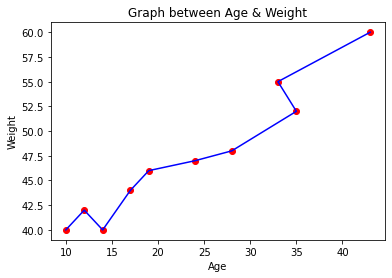

In [29]:
plt.scatter(dataset["Age"],dataset["Weight"],color="red")
plt.plot(dataset["Age"],dataset["Weight"],color="blue")

plt.title("Graph between Age & Weight")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

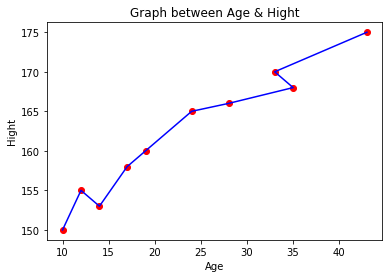

In [30]:
plt.scatter(dataset["Age"],dataset["Hight"],color="red")
plt.plot(dataset["Age"],dataset["Hight"],color="blue")
plt.title("Graph between Age & Hight")
plt.xlabel("Age")
plt.ylabel("Hight")
plt.show()

**Pie chart: Categoracal data: frequancy based dataset**

In [31]:
a = df["survived"].value_counts()
a

0    549
1    340
Name: survived, dtype: int64

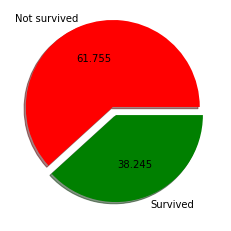

In [32]:
plt.pie(a,colors=["red","green"],labels=["Not survived","Survived"],autopct="%0.3f",shadow=True,explode=(0.1,0)) #Shift + tab
plt.show()

In [33]:
m = df["pclass"].value_counts()
m

3    491
1    214
2    184
Name: pclass, dtype: int64

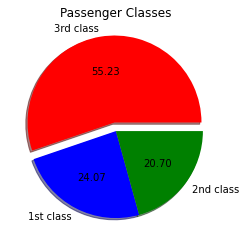

In [34]:
plt.pie(m,colors=["red","blue","green"],autopct="%0.2f",labels=["3rd class","1st class","2nd class"],explode=(0.1,0,0),
       shadow=True)

plt.title("Passenger Classes")
plt.show()

**Bar: Categoracal data: frequancy based dataset**

<AxesSubplot:>

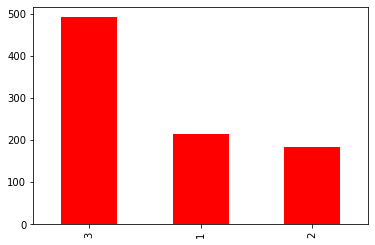

In [35]:
df["pclass"].value_counts().plot(kind="bar",color="red")

In [36]:
m = df["pclass"].value_counts()
m

3    491
1    214
2    184
Name: pclass, dtype: int64

In [37]:
value = [i for i in m]
name = ["3rd class","1st class","2nd class"]

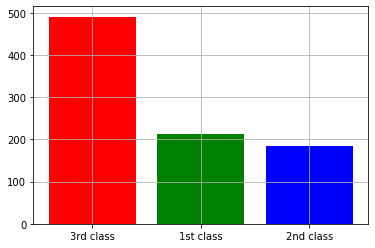

In [38]:
plt.bar(name,value,color=["r","g","b"])
plt.grid()
plt.show()

<AxesSubplot:xlabel='pclass', ylabel='count'>

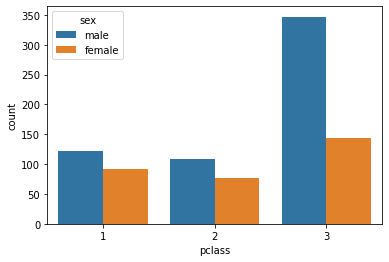

In [39]:
sns.countplot(data=df,x="pclass",hue="sex") #group plotting

**Histogram: Continous dataset: Interval frequancy based dataset**

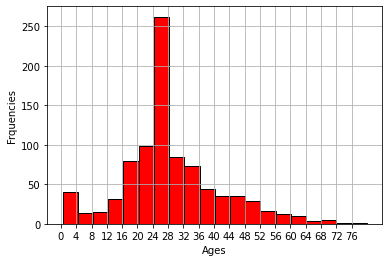

In [40]:
# histogram & Bar: showing frequencies of data
plt.hist(df["age"],color="red",bins=20,edgecolor="black")
plt.grid()
plt.xlabel("Ages")
plt.xticks(range(0,80,4))
plt.ylabel("Frquencies")
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

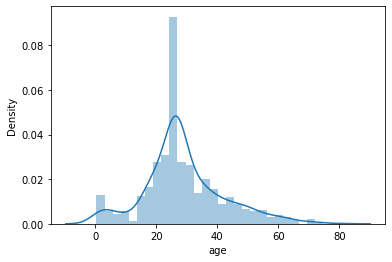

In [41]:
sns.distplot(df["age"])

**Boxplot: continous dataset: frequency based information**

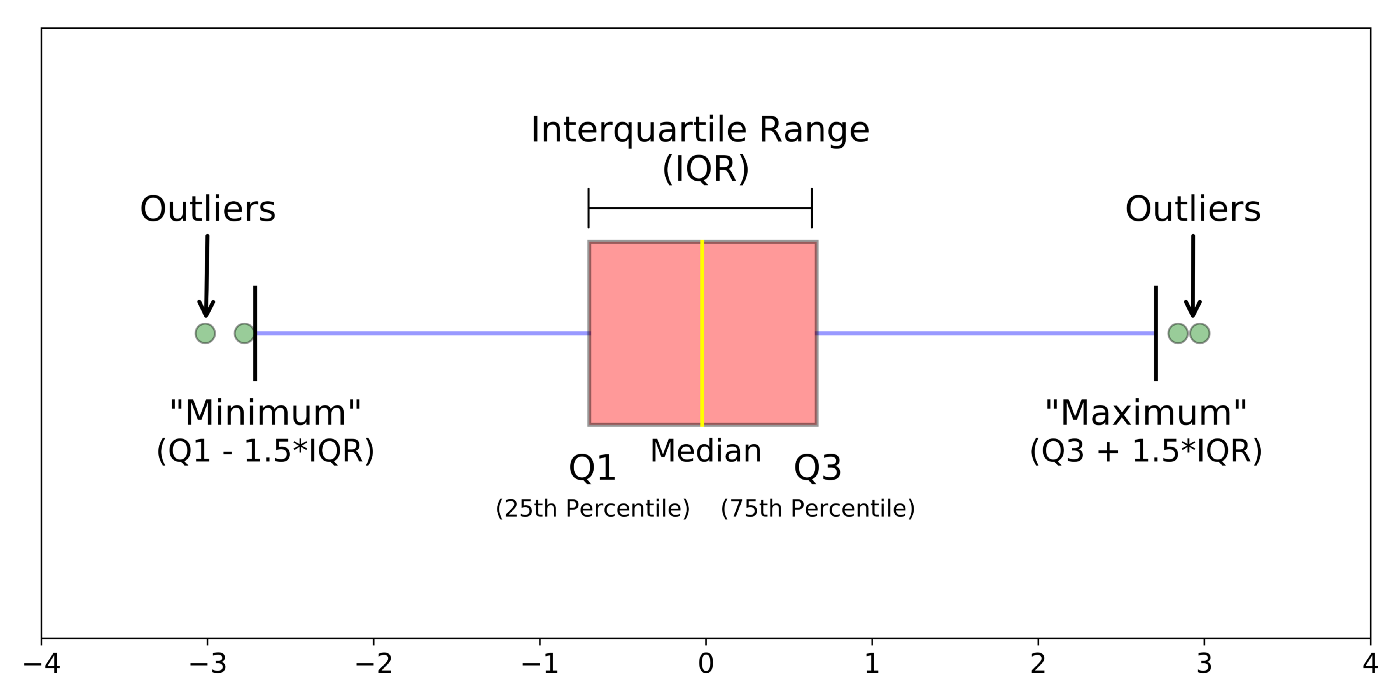

<AxesSubplot:xlabel='sex', ylabel='age'>

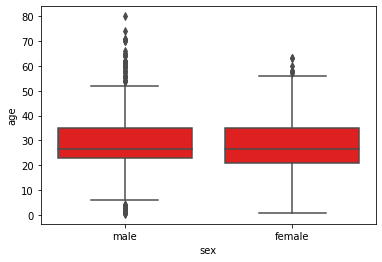

In [42]:
sns.boxplot(y = "age",x="sex",data=df,color="red")

<AxesSubplot:ylabel='age'>

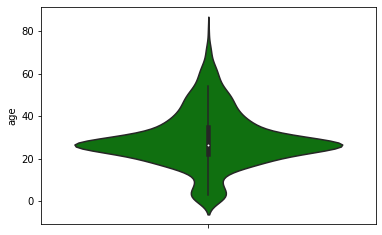

In [43]:
sns.violinplot(y="age",data=df,color="green")

# Feature Scaling: Standarization & Normalization
standard scaler 

**Z-Score**
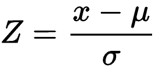


In [44]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.016502,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.028971,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.500000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
(df["age"]-29.06)/13.06

0     -0.540582
1      0.684533
2     -0.234303
3      0.454824
4      0.454824
         ...   
886   -0.157734
887   -0.770291
888   -0.196018
889   -0.234303
890    0.225115
Name: age, Length: 889, dtype: float64

# standardization

In [46]:
df1 = df[["age","fare"]]
df1

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,26.5,23.4500
889,26.0,30.0000


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [48]:
scale_df = sc.fit_transform(df1)

In [49]:
scale_df

array([[-0.53883391, -0.50023975],
       [ 0.68988989,  0.78894661],
       [-0.23165296, -0.48664993],
       ...,
       [-0.19325534, -0.17408416],
       [-0.23165296, -0.0422126 ],
       [ 0.22911846, -0.49017322]])

# Normalization: MinMax (0 to 1)

In [50]:
df1

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,26.5,23.4500
889,26.0,30.0000


In [51]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms_scale_df = ms.fit_transform(df1)

In [52]:
ms_scale_df

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [0.32772053, 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

# Outlier

A outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall observation of the dataset.

**What are the impacts of having outliers in a dataset?**
1) It courses various problems during our statistical analysis

2) It may cause a significant impact on the mean and standard deviation

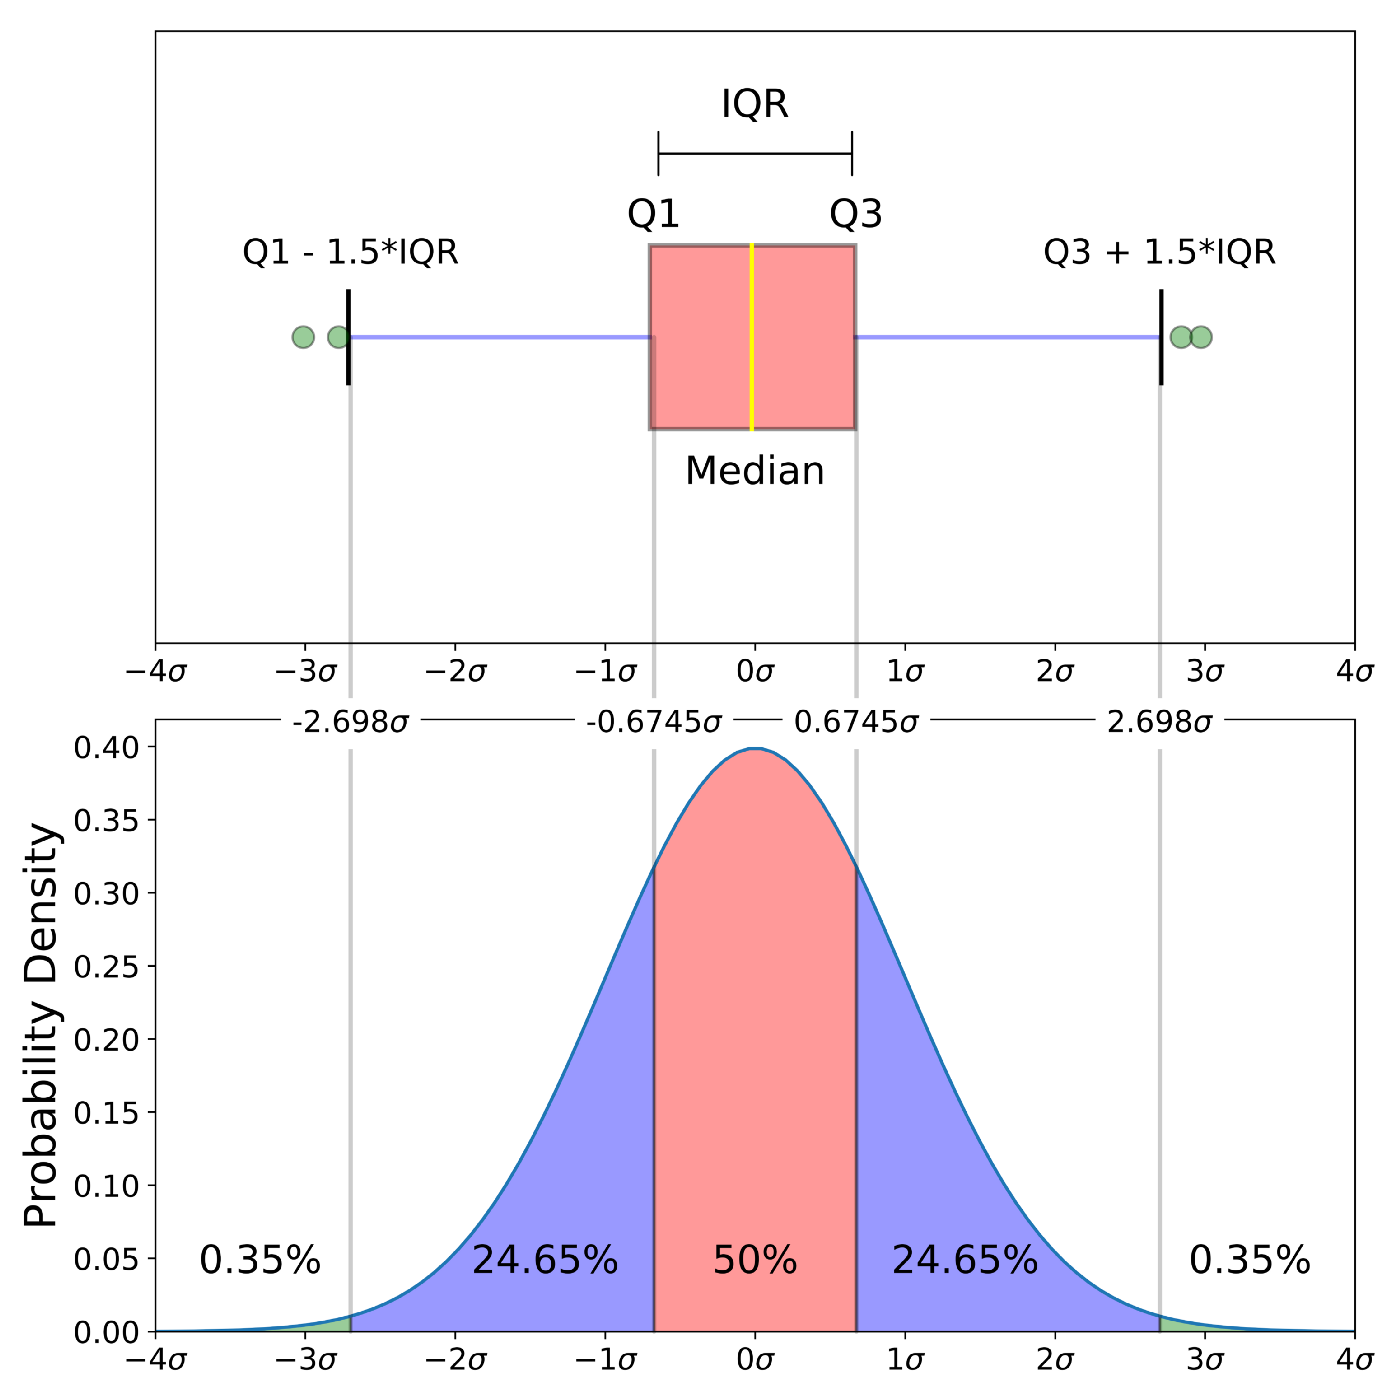

#Boxplot

In [53]:
df["age"].describe()

count    889.000000
mean      29.016502
std       13.028971
min        0.420000
25%       22.000000
50%       26.500000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [54]:
df2 = df[["age","fare"]]

In [55]:
df2.describe()

,age,fare
count,889.000000,889.000000
mean,29.016502,32.096681
std,13.028971,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,26.500000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2 = sc.fit_transform(df2)

In [57]:
df2

array([[-0.53883391, -0.50023975],
       [ 0.68988989,  0.78894661],
       [-0.23165296, -0.48664993],
       ...,
       [-0.19325534, -0.17408416],
       [-0.23165296, -0.0422126 ],
       [ 0.22911846, -0.49017322]])

In [58]:
#Find outlier in Age Column

In [59]:
out = []
for var in df2[:,0]:
    if var>3 or var<-3:
        out.append(var)

In [60]:
out

[3.2241327241298805,
 3.185735105378399,
 3.2241327241298805,
 3.9152898616565475,
 3.1473374866269177,
 3.1473374866269177,
 3.4545184366387693]

In [61]:
for i in out:
    age = i*13.028971+29.016502
    print(age)

71.02363376283921
70.52335230165711
71.02363376283921
80.02870006411717
70.023070840475
70.023070840475
74.02532252993187


# Pearson correlation: Feature selection

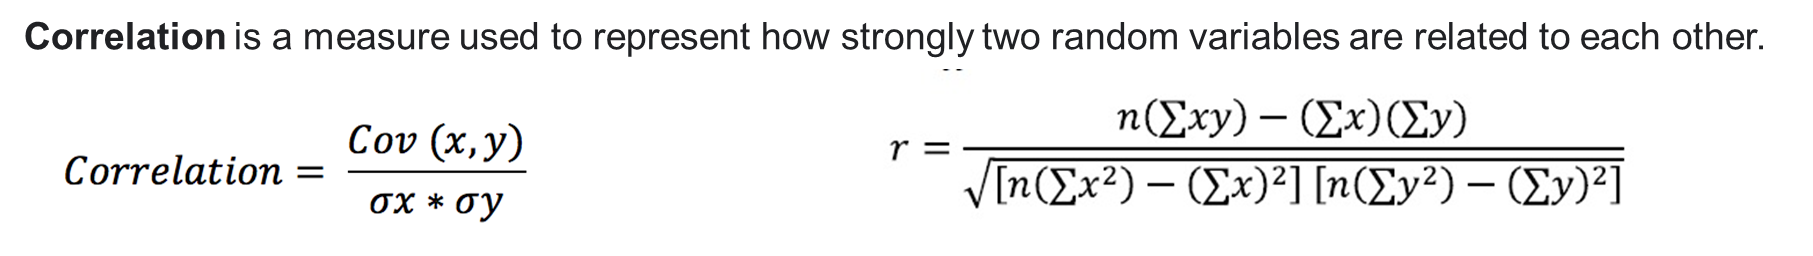

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
dtypes: bool(1), category(1), float64(2), int64(4), object(5)
memory usage: 85.2+ KB


In [63]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male
survived,1.000000,-0.335549,-0.065401,-0.034040,0.083151,0.255290,-0.555520
pclass,-0.335549,1.000000,-0.343273,0.081656,0.016824,-0.548193,0.090098
age,-0.065401,-0.343273,1.000000,-0.232605,-0.165169,0.097979,0.248108
sibsp,-0.034040,0.081656,-0.232605,1.000000,0.414542,0.160887,-0.255401
parch,0.083151,0.016824,-0.165169,0.414542,1.000000,0.217532,-0.351945
fare,0.255290,-0.548193,0.097979,0.160887,0.217532,1.000000,-0.179851
adult_male,-0.555520,0.090098,0.248108,-0.255401,-0.351945,-0.179851,1.000000


In [64]:
df.corr()["survived"]

survived      1.000000
pclass       -0.335549
age          -0.065401
sibsp        -0.034040
parch         0.083151
fare          0.255290
adult_male   -0.555520
Name: survived, dtype: float64

In [65]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no


# Data Transfermation

In [66]:
df["sex"] = df["sex"].replace({"male":1,"female":0}) #labeling: LabelEncoder

In [67]:
df.corr()["survived"]

survived      1.000000
pclass       -0.335549
sex          -0.541585
age          -0.065401
sibsp        -0.034040
parch         0.083151
fare          0.255290
adult_male   -0.555520
Name: survived, dtype: float64

# Get_dummies

In [68]:
df1 = sns.load_dataset("titanic")

In [69]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
cat_df = df1[["sex","class"]]

In [71]:
pd.get_dummies(cat_df)

,sex_female,sex_male,class_First,class_Second,class_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,1,0
887,1,0,1,0,0
888,1,0,0,0,1
889,0,1,1,0,0


# Matrix Plot

In [72]:
a = df.corr()

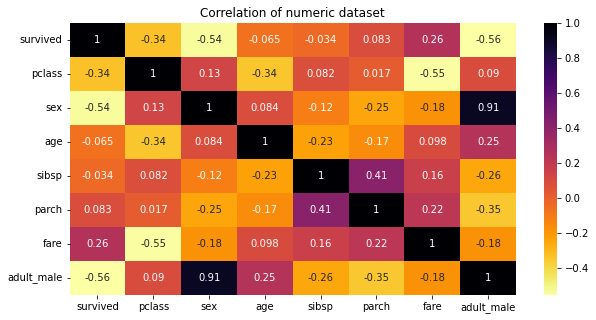

In [73]:
plt.figure(figsize=(10,5))
sns.heatmap(a,annot=True,cmap="inferno_r")
plt.title("Correlation of numeric dataset")
plt.show()

# Automatic EDA: Pandas-profiling

In [ ]:
#!pip install pandas_profiling

In [78]:
from pandas_profiling import ProfileReport

In [79]:
prof = ProfileReport(df)

In [81]:
prof.to_file(output_file='output.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install sweetviz

In [84]:
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [ ]:
advert_report.show_html('Advertising.html')